<a href="https://colab.research.google.com/github/IsaiasGabrielDev/Trabalho_FuzzyBasquete/blob/main/trabalho_basquete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

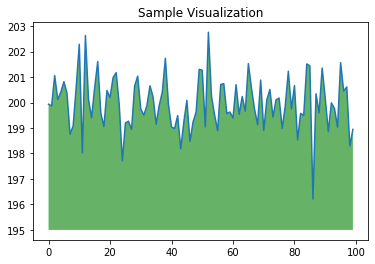

In [1]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()


In [2]:
!pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=fd4c295375ac6e48d1faf1d2cf1def0728385e7338f2c938f8f77fee1ef6e6fc
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl
import skfuzzy as fuzz


exemplo


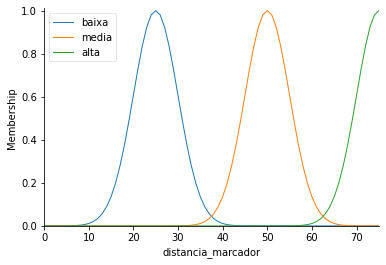

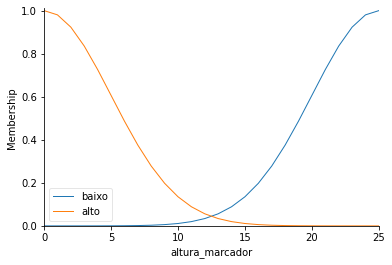

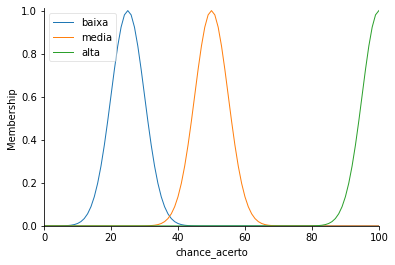

In [82]:
if __name__=='__main__':
            print("exemplo")

            #variaveis de entrada 
            distancia_marcador = ctrl.Antecedent(np.arange(0,76,1),'distancia_marcador')
            altura_marcador = ctrl.Antecedent(np.arange(0,26,1),'altura_marcador' )

            #variaveis de saida
            chance_acerto = ctrl.Consequent(np.arange(0,101,1),'chance_acerto')

            #variaveis/ fuzzyficaçao 
            distancia_marcador['baixa'] = fuzz.gaussmf(distancia_marcador.universe, 25, 5)
            distancia_marcador['media'] = fuzz.gaussmf(distancia_marcador.universe, 50, 5)
            distancia_marcador['alta'] = fuzz.gaussmf(distancia_marcador.universe,75, 5)

            altura_marcador ['baixo'] = fuzz.gaussmf(altura_marcador.universe, 25, 5)
            altura_marcador ['alto'] = fuzz.gaussmf(altura_marcador.universe, 0, 5)
            
            chance_acerto['baixa'] = fuzz.gaussmf(chance_acerto.universe, 25, 5)
            chance_acerto['media'] = fuzz.gaussmf(chance_acerto.universe, 50, 5)
            chance_acerto['alta'] = fuzz.gaussmf(chance_acerto.universe, 100, 5)

            #print os traços 
            distancia_marcador.view()
            altura_marcador.view()
            chance_acerto.view()
            plt.show()


95.99471053508614


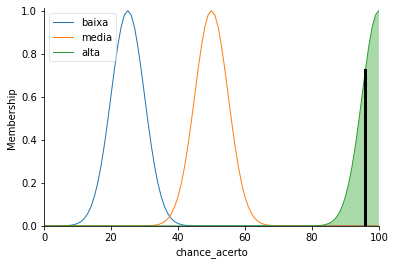

In [83]:
          #definicao das regras 

          regra1 = ctrl.Rule(distancia_marcador['alta'] & altura_marcador['baixo'],chance_acerto['alta'])
          regra2 = ctrl.Rule(distancia_marcador['alta'] & altura_marcador['alto'],chance_acerto['media'])
          regra3 = ctrl.Rule(distancia_marcador['media'] & altura_marcador['alto'],chance_acerto['baixa'])
          regra4 = ctrl.Rule(distancia_marcador['media'] & altura_marcador['baixo'],chance_acerto['alta'])
          regra5 = ctrl.Rule(distancia_marcador['baixa'] & altura_marcador['baixo'],chance_acerto['media'])
          regra6 = ctrl.Rule(distancia_marcador['baixa'] & altura_marcador['alto'],chance_acerto['baixa'])

          #ativacao das regras 

          controle_chance_acerto = ctrl.ControlSystem([regra1,regra2,regra3,regra4, regra5, regra6])
          simulador_chance_acerto = ctrl.ControlSystemSimulation(controle_chance_acerto)

          inputaltura = 1.5
          inputdistancia = 1.6

          percent_altura = 25 if inputaltura < 1.85 else 0   
          if inputdistancia > 2.5 :
            percent_distancia = 75
          elif inputdistancia > 1.5 :
            percent_distancia = 50
          else :
              percent_distancia = 25

          simulador_chance_acerto.input['distancia_marcador']= percent_distancia
          simulador_chance_acerto.input['altura_marcador']= percent_altura

          simulador_chance_acerto.compute()

          #agregação

          print(simulador_chance_acerto.output['chance_acerto'])
          chance_acerto.view(sim=simulador_chance_acerto)
          plt.show()